In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import numpy as np
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2


# Histogram frekuensi

In [63]:
def plot_hist(df):
    cols = (
        df
        .select_dtypes(include=[int, float])
        .columns
    )
    ncols = 2
    nrows = np.ceil(len(cols) / ncols).astype(int)
    vertical_figsize = 2 * nrows

    axs = plt.subplots(nrows, ncols, figsize=[10, vertical_figsize])[1].flatten()

    for col, ax in zip(cols, axs):
        df[col].plot.hist(title=col, ax=ax)
    plt.tight_layout()
    plt.show()

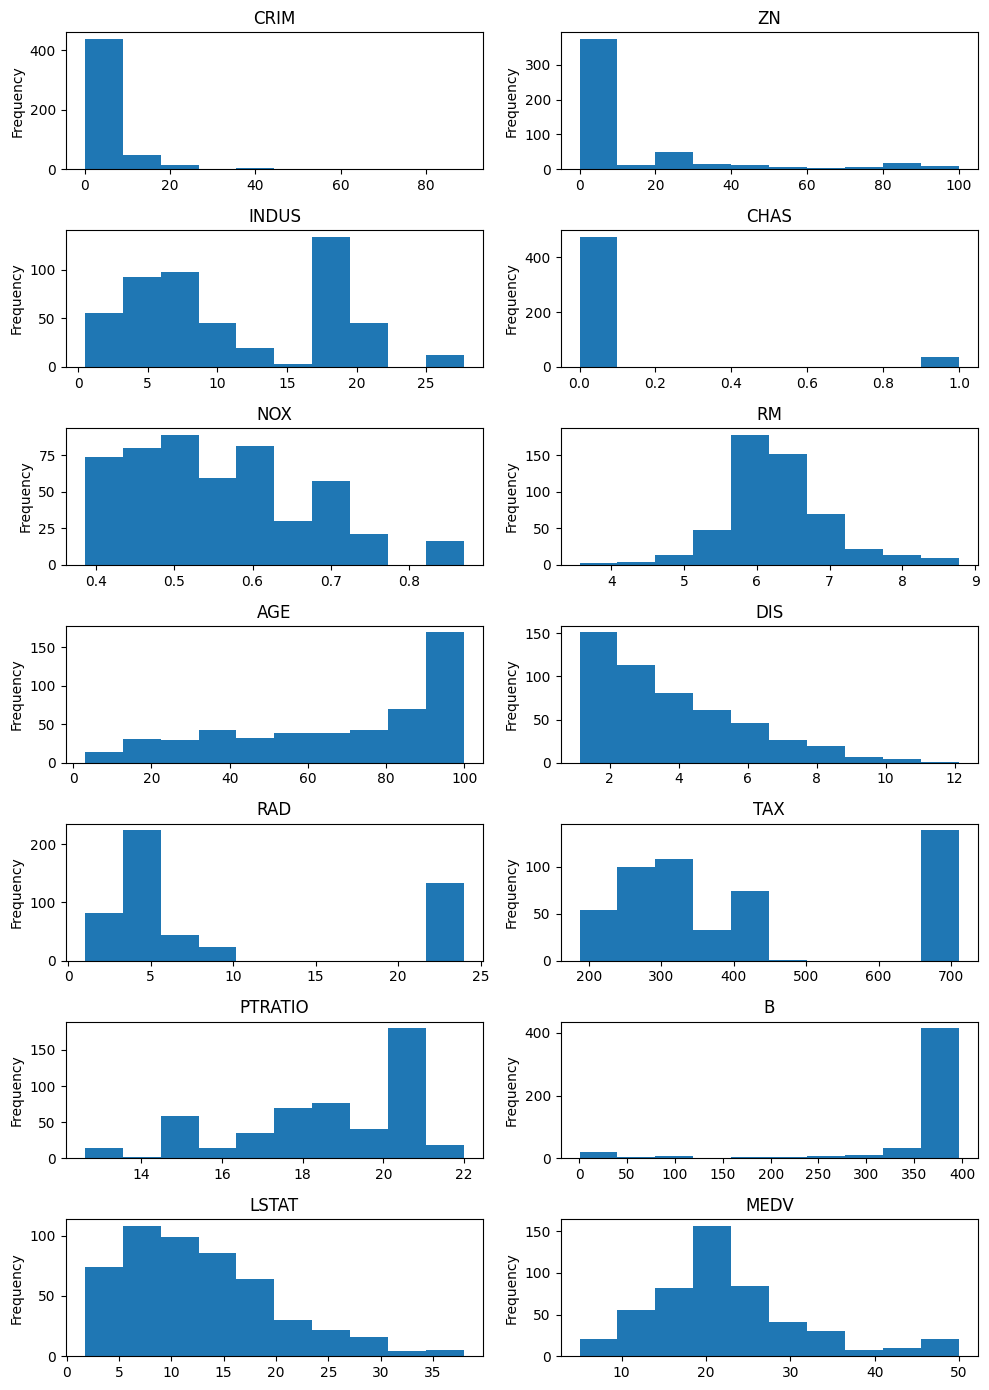

In [64]:
plot_hist(df)

# Normalisasi

C:\Users\David's PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\David's PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\David's PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return 

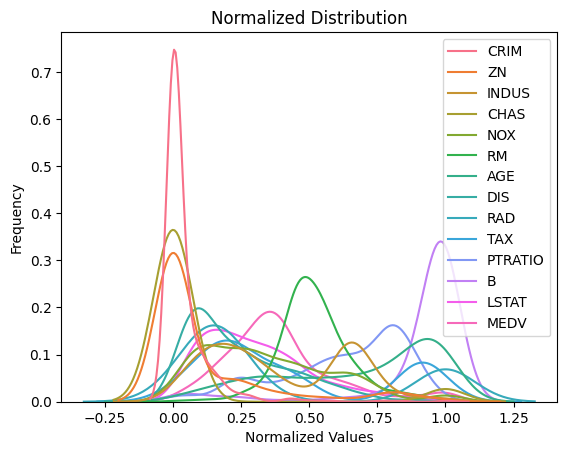

In [6]:
data_normalized = (df - np.min(df)) / (np.max(df) - np.min(df))

sns.kdeplot(data_normalized)
plt.xlabel('Normalized Values')
plt.ylabel('Frequency')
plt.title('Normalized Distribution')
plt.show()

# Regresi

## Hubungan antara tingkat kriminalitas dan harga

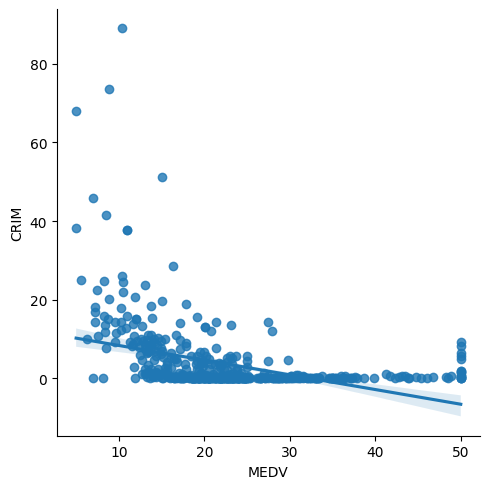

In [66]:
sns.lmplot(data=df, x = 'MEDV', y = 'CRIM')

## Hubungan antara rata-rata harga dan persentase plot tanah hunian yang lebih dari 25,000 sqft (2322.576 sqm)

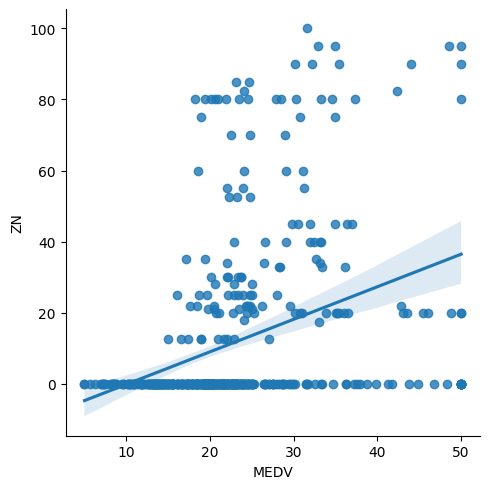

In [45]:
sns.lmplot(data=df,x='MEDV',y='ZN')

## Hubungan antara rata-rata harga dan kadar nitrogen monoksida

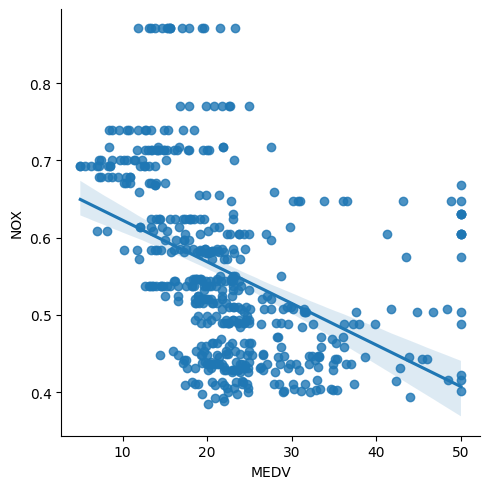

In [17]:
sns.lmplot(data=df, y = 'NOX', x = 'MEDV')

## perbandingan rata-rata harga dan kadar nitrogen monoksida di tempat yang persentase plot tanah hunian yang tidak lebih dari 25,000 sqft (2322.576 sqm); ZN = 0

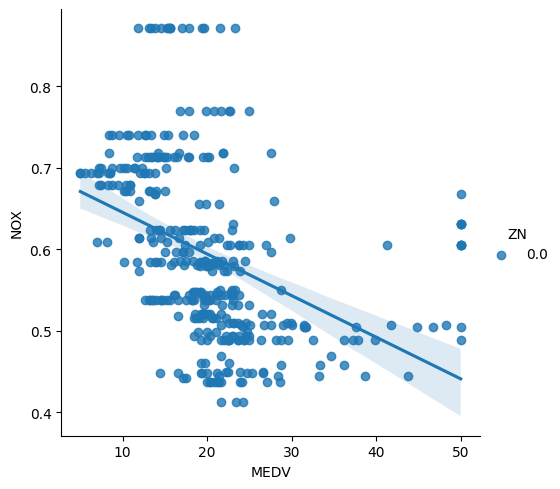

In [15]:
df_znzero = df[df['ZN'] == 0]
sns.lmplot(data=df_znzero, y = 'NOX', x = 'MEDV', hue = 'ZN')

## Hubungan antara jumlah kamar dalam satu hunian dan rata-rata harga

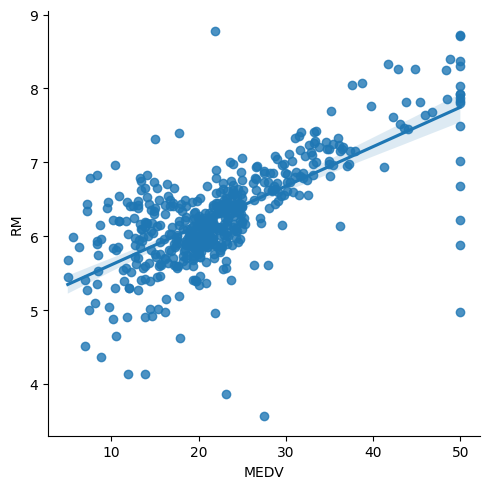

In [19]:
sns.lmplot(data=df, y = 'RM', x = 'MEDV')

## Hubungan antara umur bangunan dan pajak

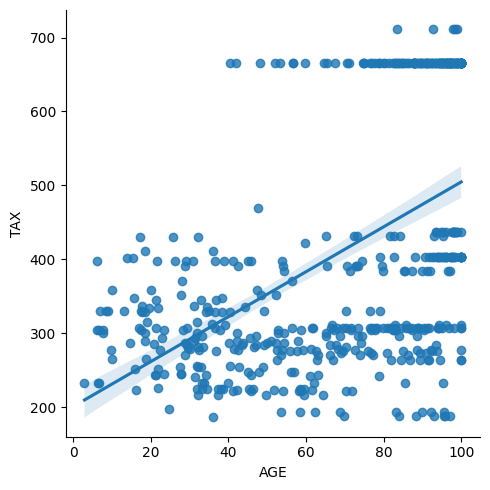

In [28]:
sns.lmplot(data=df, x = 'AGE', y = 'TAX')

## Hubungan antara kesempatan kerja dan wilayah tempat yang persentase plot tanah hunian yang lebih dari 25,000 sqft (2322.576 sqm)

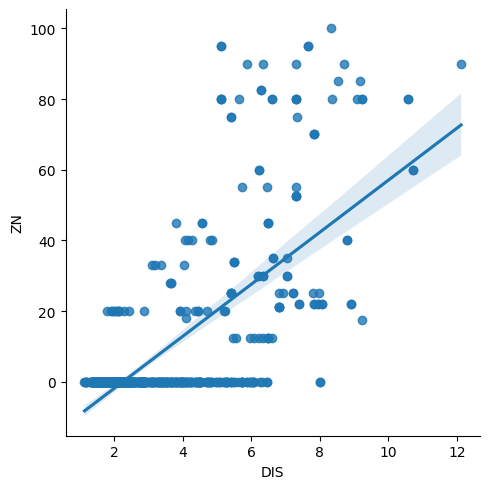

In [58]:
sns.lmplot(data=df, x = 'DIS', y = 'ZN')